# Heart Failure Prediction -- Binary Classification Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

In [2]:
# read in data
df = pd.read_csv('data/heart.csv')
print(df.shape)
print(df.head())

(918, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [3]:
y = df['HeartDisease']
X = df.drop(columns = ['HeartDisease'])
# data types
X.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
dtype: object

In [4]:
# check missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Exploratory Data Analysis


Perform a thorough EDA on each column in your dataset and pay special attention to your target variable

Use .describe or .value_counts, create histograms or bar plots as appropriate


Visualize the target variable. If it’s a classification problem, calculate the balances of each class. If it’s a regression variable, study its distribution. Any skewness? Outliers? Do the values vary over several orders of magnitudes or just one?


Create other type of figures using two columns


There is no need to include everything in the report.


Choose at least three but maximum five figures that you think are interesting or important and one of those figures should show the target variable. Do not include three figures of the same type (e.g., you’ll lose points if you submit three bar plots). Use at least two figure types.


Write a figure caption for each figure.


Make sure your figures are publication-quality. Please print out your report before you submit it and make sure the figures are readable, the font size is similar to the text font size, axes are labeled, the figures have sufficient resolution (usually 300 dpi).

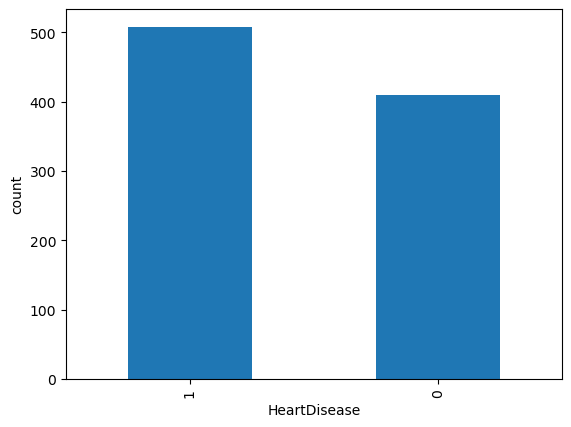

In [5]:
# visualize the target variable
pd.value_counts(df['HeartDisease']).plot.bar()
plt.ylabel('count')
plt.xlabel('HeartDisease')
plt.show()

In [6]:
classes, counts = np.unique(y,return_counts=True)
print('balance:',np.max(counts/len(y)))

balance: 0.5533769063180828


### Univariate

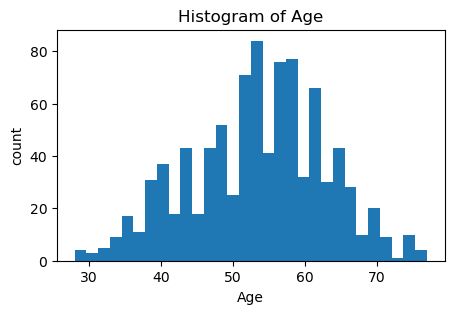

In [38]:
# Histogram of Age
plt.figure(figsize=(5,3))

df['Age'].plot.hist(bins = int(np.sqrt(df.shape[0]))) 
                  
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Histogram of Age')
plt.show()

In [39]:
# Age
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

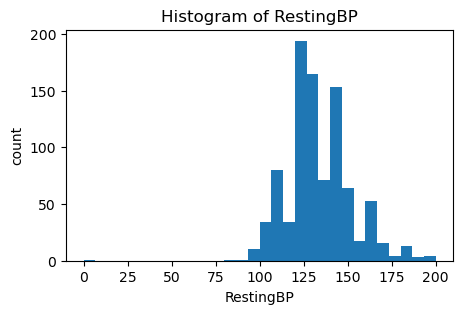

In [8]:
# Histogram of RestingBP
plt.figure(figsize=(5,3))

df['RestingBP'].plot.hist(bins = int(np.sqrt(df.shape[0]))) 
                  
plt.xlabel('RestingBP')
plt.ylabel('count')
plt.title('Histogram of RestingBP')
plt.show()

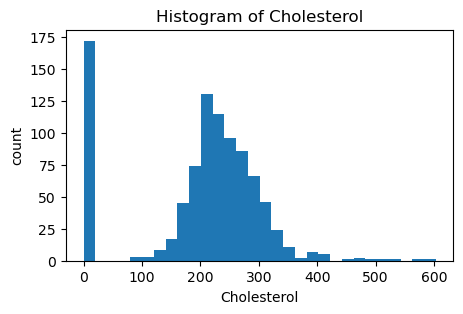

In [9]:
# Histogram of Cholesterol
plt.figure(figsize=(5,3))

df['Cholesterol'].plot.hist(bins = int(np.sqrt(df.shape[0]))) 
                  
plt.xlabel('Cholesterol')
plt.ylabel('count')
plt.title('Histogram of Cholesterol')
plt.show()

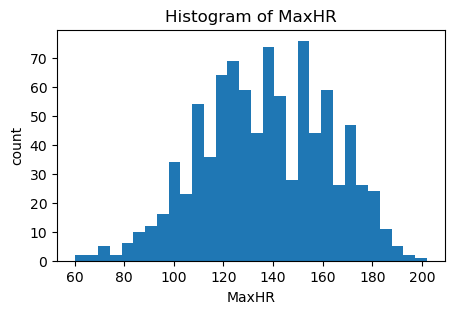

In [10]:
# Histogram of MaxHR
plt.figure(figsize=(5,3))

df['MaxHR'].plot.hist(bins = int(np.sqrt(df.shape[0]))) 
                  
plt.xlabel('MaxHR')
plt.ylabel('count')
plt.title('Histogram of MaxHR')
plt.show()

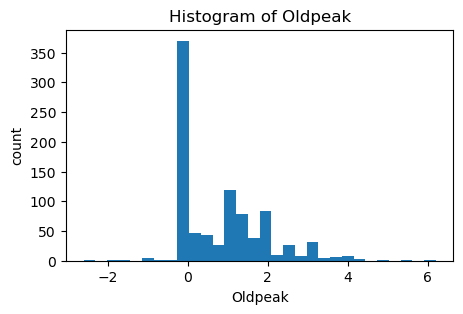

In [11]:
# Histogram of Oldpeak
plt.figure(figsize=(5,3))

df['Oldpeak'].plot.hist(bins = int(np.sqrt(df.shape[0]))) 
                  
plt.xlabel('Oldpeak')
plt.ylabel('count')
plt.title('Histogram of Oldpeak')
plt.show()

### Multivariate

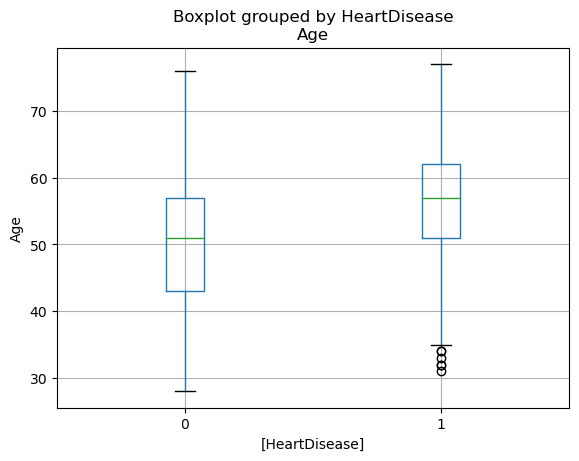

In [12]:
# Age
df[['Age','HeartDisease']].boxplot(by='HeartDisease')
plt.ylabel('Age')
plt.show()

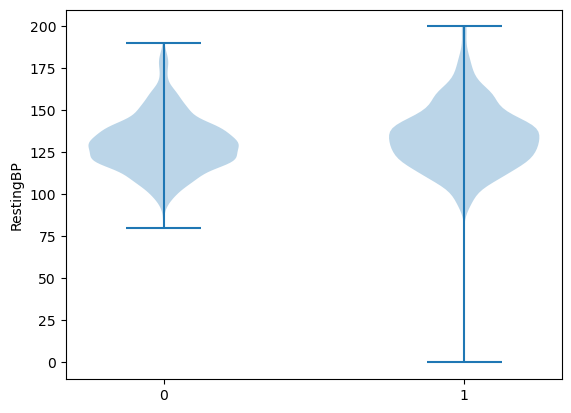

In [13]:
# RestingBP
dataset = [df[df['HeartDisease']==0]['RestingBP'].values,
           df[df['HeartDisease']==1]['RestingBP'].values]
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['0','1'])
plt.ylabel('RestingBP')
plt.show()

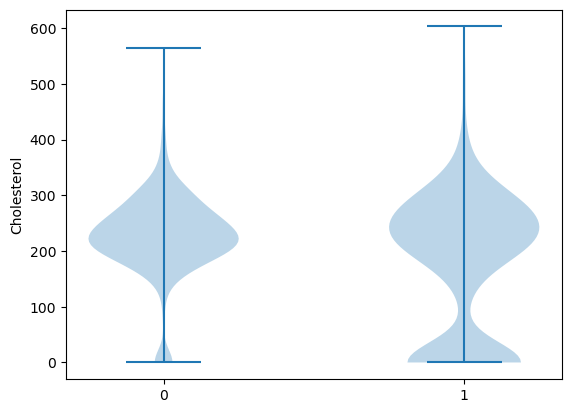

In [14]:
# Cholesterol
dataset = [df[df['HeartDisease']==0]['Cholesterol'].values,
           df[df['HeartDisease']==1]['Cholesterol'].values]
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['0','1'])
plt.ylabel('Cholesterol')
plt.show()

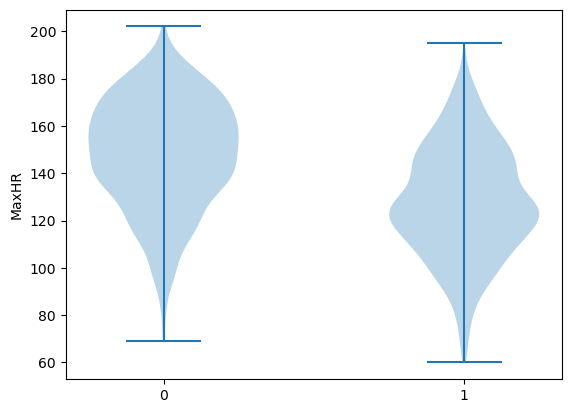

In [15]:
# MaxHR
dataset = [df[df['HeartDisease']==0]['MaxHR'].values,
           df[df['HeartDisease']==1]['MaxHR'].values]
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['0','1'])
plt.ylabel('MaxHR')
plt.show()

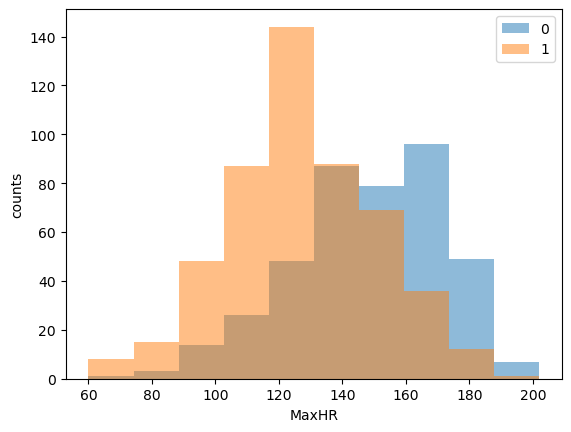

In [16]:
# MaxHR
categories = df['HeartDisease'].unique()
bin_range = (df['MaxHR'].min(),df['MaxHR'].max())
for c in categories:
    plt.hist(df[df['HeartDisease']==c]['MaxHR'],alpha=0.5,label=c,range=bin_range)
plt.legend()
plt.ylabel('counts')
plt.xlabel('MaxHR')
plt.show()

### Categorical: ChestPainType

In [17]:
# ChestPainType
count_matrix = df.groupby(['ChestPainType', 'HeartDisease']).size().unstack()
#print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

HeartDisease          0         1
ChestPainType                    
ASY            0.209677  0.790323
ATA            0.861272  0.138728
NAP            0.645320  0.354680
TA             0.565217  0.434783


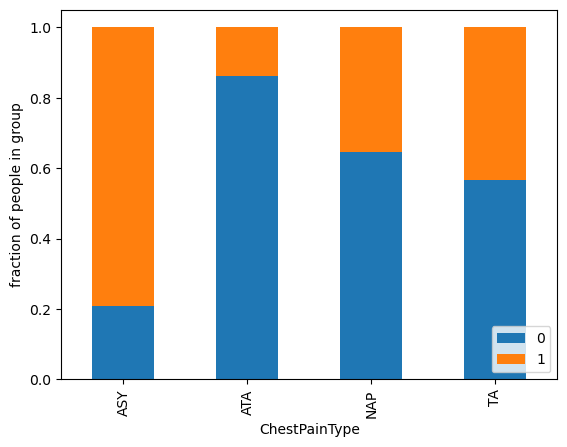

In [18]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

### Categorical: ST_Slope

In [19]:
# ST_Slope
count_matrix_slope = df.groupby(['ST_Slope', 'HeartDisease']).size().unstack()
#print(count_matrix)
count_matrix_norm_slope = count_matrix_slope.div(count_matrix_slope.sum(axis=1),axis=0)
print(count_matrix_norm_slope)

HeartDisease         0         1
ST_Slope                        
Down          0.222222  0.777778
Flat          0.171739  0.828261
Up            0.802532  0.197468


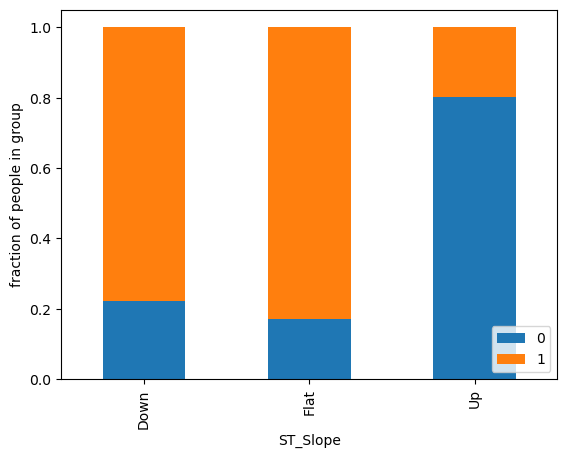

In [20]:
count_matrix_norm_slope.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

### Categorical: RestingECG

In [21]:
count_matrix_ecg = df.groupby(['RestingECG', 'HeartDisease']).size().unstack()
#print(count_matrix)
count_matrix_norm_ecg = count_matrix_ecg.div(count_matrix_ecg.sum(axis=1),axis=0)
print(count_matrix_norm_ecg)

HeartDisease         0         1
RestingECG                      
LVH           0.436170  0.563830
Normal        0.483696  0.516304
ST            0.342697  0.657303


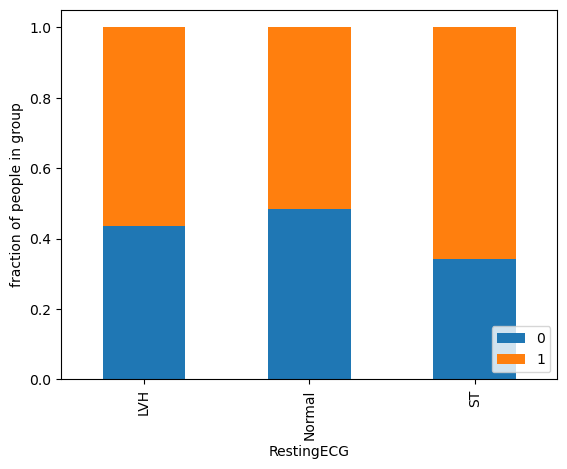

In [22]:
count_matrix_norm_ecg.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

### Between Features

<Figure size 500x300 with 0 Axes>

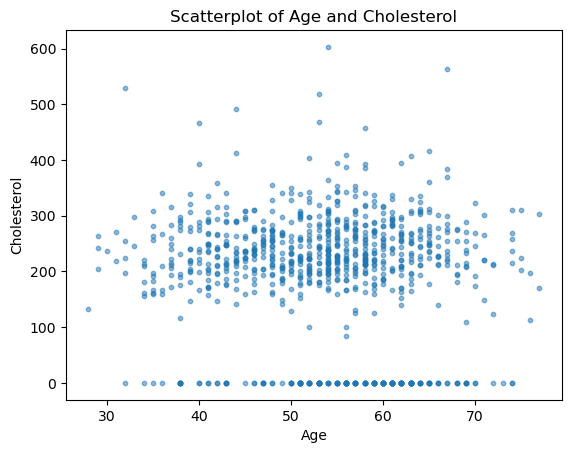

In [23]:
# Age vs Cholesterol
plt.figure(figsize=(5,3))
df.plot.scatter('Age','Cholesterol', s=10, alpha=0.5) 
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatterplot of Age and Cholesterol')
plt.show()

<Figure size 500x300 with 0 Axes>

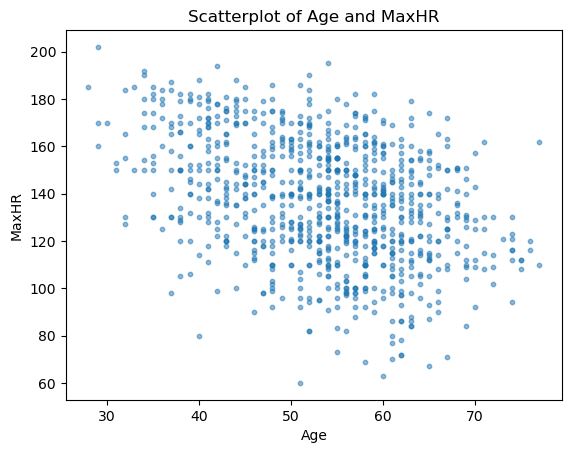

In [24]:
# Age vs MaxHR
plt.figure(figsize=(5,3))
df.plot.scatter('Age','MaxHR', s=10, alpha=0.5) 
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.title('Scatterplot of Age and MaxHR')
plt.show()

<Figure size 500x300 with 0 Axes>

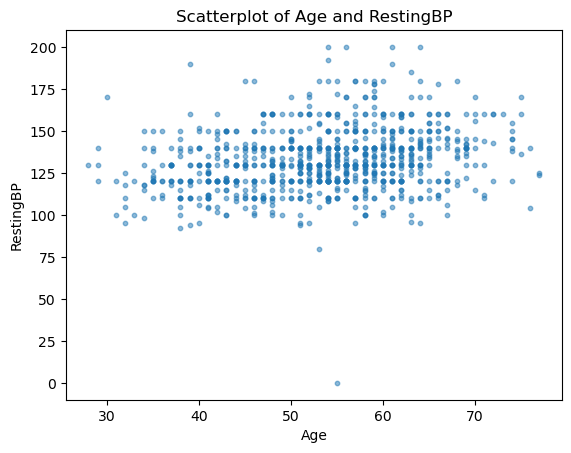

In [25]:
# Age vs RestingBP
plt.figure(figsize=(5,3))
df.plot.scatter('Age','RestingBP', s=10, alpha=0.5) 
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.title('Scatterplot of Age and RestingBP')
plt.show()

## Data Preprocessing

### Split dataset

In [26]:
from sklearn.model_selection import train_test_split

def basic_split(X,y,train_size,val_size,test_size,random_state):
    
    # test the inputs
    if train_size + val_size + test_size != 1:
        print('The sum of train_size, val_size, and test_size is NOT 1.')
    if not isinstance(random_state, int):
        print('random_state is NOT an integer.')
    
    # perform basic split
    
    # split to separate out the training set
    X_train, X_other, y_train, y_other = train_test_split(X,y, \
                                                          train_size = train_size,random_state = random_state)
    
    # split to separate out the validation and test sets
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other, \
                                                    train_size = val_size / (val_size + test_size), \
                                                    random_state = random_state)
    
    # test the outputs
    val_fail = abs(X_train.shape[0]/X_val.shape[0] - train_size/val_size) > 0.05
    test_fail = abs(X_train.shape[0]/X_test.shape[0] - train_size/test_size) > 0.05
    if val_fail | test_fail:
        print('The output sizes are NOT as expected.')
        print(X_train.shape[0])
        print(X_val.shape[0])
        print(X_test.shape[0])
    
    return X_train, y_train, X_val, y_val, X_test, y_test


In [27]:
# Apply the function to the diabetes dataset with train_size = 0.6, val_size = 0.2, and test_size = 0.2
X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X,y,0.6,0.2,0.2,42)

# Print out the head of X_train, X_val, and X_test
print(X_train.head())
print(X_val.head())
print(X_test.head())

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
462   59   M           ASY        122          233          0     Normal   
433   46   M           ASY        110          236          0     Normal   
163   42   M           ATA        120          196          0     Normal   
248   45   M           ASY        130          219          0         ST   
582   69   M           ASY        122          216          1        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  
462    117              Y      1.3     Down  
433    125              Y      2.0     Flat  
163    150              N      0.0       Up  
248    130              Y      1.0     Flat  
582     84              Y      0.0     Flat  
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
326   45   M           NAP        110            0          0     Normal   
749   54   M           NAP        150          232          0        LVH   
211   50   F           NAP        140  

### Apply MinMaxEncoder or StandardScaler on the continuous features

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [40]:
# Apply MinMaxEncoder to Age

mm_ftrs = ['Age']
mm_scaler = MinMaxScaler()
print(mm_scaler.fit_transform(X_train[mm_ftrs]))
print(mm_scaler.transform(X_val[std_ftrs]))
print(mm_scaler.transform(X_test[std_ftrs]))

[[0.625     ]
 [0.35416667]
 [0.27083333]
 [0.33333333]
 [0.83333333]
 [0.39583333]
 [0.54166667]
 [0.1875    ]
 [0.66666667]
 [0.125     ]
 [0.35416667]
 [0.41666667]
 [0.52083333]
 [0.47916667]
 [0.8125    ]
 [0.54166667]
 [0.89583333]
 [0.54166667]
 [0.29166667]
 [0.375     ]
 [0.60416667]
 [0.39583333]
 [0.47916667]
 [0.20833333]
 [0.60416667]
 [0.54166667]
 [0.47916667]
 [0.125     ]
 [0.64583333]
 [0.39583333]
 [0.5625    ]
 [0.8125    ]
 [0.20833333]
 [0.75      ]
 [0.16666667]
 [0.64583333]
 [0.85416667]
 [0.45833333]
 [0.625     ]
 [0.375     ]
 [0.75      ]
 [0.52083333]
 [0.3125    ]
 [0.1875    ]
 [0.14583333]
 [0.22916667]
 [0.6875    ]
 [0.27083333]
 [0.52083333]
 [0.39583333]
 [0.6875    ]
 [0.54166667]
 [0.25      ]
 [0.72916667]
 [0.47916667]
 [0.1875    ]
 [0.39583333]
 [0.35416667]
 [0.70833333]
 [0.58333333]
 [0.35416667]
 [0.52083333]
 [0.39583333]
 [0.41666667]
 [0.41666667]
 [0.35416667]
 [0.45833333]
 [0.60416667]
 [0.8125    ]
 [0.60416667]
 [0.47916667]
 [0.29

NameError: name 'std_ftrs' is not defined

In [41]:
# Apply StandardScaler to 

std_ftrs = ['RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']
std_scaler = StandardScaler()
print(std_scaler.fit_transform(X_train[std_ftrs]))
print(std_scaler.transform(X_val[std_ftrs]))
print(std_scaler.transform(X_test[std_ftrs]))

[[-0.5852465   0.29926853 -0.82902473  0.3640493 ]
 [-1.23030777  0.32745146 -0.50252018  1.00433702]
 [-0.69275671 -0.04832091  0.51780653 -0.82505646]
 ...
 [-0.15520565  0.48715471  0.27292812  0.45551898]
 [ 1.02740668 -1.8896055  -0.78821166 -0.82505646]
 [ 0.91989647  1.79296368 -0.29845484  1.00433702]]
[[-1.23030777e+00 -1.88960550e+00  2.80497089e-02 -9.16526133e-01]
 [ 9.19896468e-01  2.89874219e-01  1.13000256e+00  6.38458324e-01]
 [ 3.82345408e-01  8.15955530e-01  1.09675846e-01 -8.25056459e-01]
 [-4.77736287e-01  6.09280729e-01 -1.15552928e+00  1.18727637e+00]
 [-1.23030777e+00  8.04494473e-03  5.17806531e-01 -8.25056459e-01]
 [ 6.05966649e-03 -1.51658310e-01 -5.35764281e-02 -6.42117111e-01]
 [ 3.82345408e-01  6.44107995e-02  8.85124147e-01  5.46988650e-01]
 [ 4.89855620e-01  6.46857966e-01 -5.02520181e-01  1.46168539e+00]
 [-6.92756711e-01 -3.11361566e-01  9.25937215e-01 -8.25056459e-01]
 [ 3.60765177e+00 -1.88960550e+00  1.09675846e-01  8.96402805e-02]
 [ 9.19896468e-01 

### Apply OneHotEncoder or OrdinalEncoder on categorical features

In [29]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [34]:
# Apply OrdinalEncoder to ChestPainType and RestingECG

ordinal_ftrs = ['ChestPainType',  'RestingECG'] 
ordinal_cats = [['TA','ATA','NAP','ASY'], ['Normal', 'ST', 'LVH']]

ordinal_enc = OrdinalEncoder(categories = ordinal_cats)   

# fit the training data
ordinal_enc.fit(X_train[ordinal_ftrs]) 

# transform X_train
ordinal_train = ordinal_enc.transform(X_train[ordinal_ftrs])
print('transformed train features:')
print(ordinal_train)

# transform X_val
ordinal_val = ordinal_enc.transform(X_val[ordinal_ftrs])
print('transformed validation features:')
print(ordinal_val)

# transform X_test
ordinal_test = ordinal_enc.transform(X_test[ordinal_ftrs])
print('transformed test features:')
print(ordinal_test)


transformed train features:
[[3. 0.]
 [3. 0.]
 [1. 0.]
 ...
 [3. 0.]
 [3. 1.]
 [3. 0.]]
transformed validation features:
[[2. 0.]
 [2. 2.]
 [2. 0.]
 [3. 2.]
 [3. 0.]
 [2. 1.]
 [3. 0.]
 [0. 0.]
 [1. 0.]
 [3. 0.]
 [3. 0.]
 [1. 2.]
 [3. 0.]
 [3. 1.]
 [1. 0.]
 [3. 0.]
 [3. 1.]
 [3. 0.]
 [1. 0.]
 [2. 0.]
 [2. 0.]
 [3. 0.]
 [3. 0.]
 [2. 1.]
 [3. 0.]
 [2. 0.]
 [3. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [2. 0.]
 [3. 0.]
 [2. 0.]
 [3. 1.]
 [0. 2.]
 [2. 0.]
 [3. 0.]
 [2. 0.]
 [2. 0.]
 [3. 1.]
 [2. 0.]
 [3. 2.]
 [3. 0.]
 [0. 0.]
 [3. 1.]
 [3. 0.]
 [2. 0.]
 [1. 2.]
 [3. 1.]
 [3. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [3. 1.]
 [3. 0.]
 [3. 2.]
 [1. 1.]
 [2. 0.]
 [3. 0.]
 [1. 0.]
 [3. 0.]
 [2. 0.]
 [1. 0.]
 [3. 2.]
 [1. 0.]
 [2. 0.]
 [0. 2.]
 [3. 0.]
 [0. 1.]
 [1. 0.]
 [2. 1.]
 [0. 1.]
 [2. 2.]
 [3. 0.]
 [1. 0.]
 [3. 1.]
 [2. 2.]
 [1. 1.]
 [2. 0.]
 [3. 1.]
 [3. 0.]
 [3. 0.]
 [3. 2.]
 [0. 1.]
 [2. 2.]
 [3. 2.]
 [0. 2.]
 [3. 2.]
 [3. 2.]
 [3. 2.]
 [2. 1.]
 [2. 2.]
 [3. 0.]
 [1. 1.]
 [3. 0.]
 [3. 2.]
 [1. 0.]
 [1. 1

In [42]:
# Apply OneHotEncoder to Sex, ST_Slope, and ExerciseAngina

ftrs = ['Sex', 'ST_Slope', 'ExerciseAngina']

# initialize the encoder
enc = OneHotEncoder(sparse=False, handle_unknown = 'ignore') 

# transform X_train
X_train_ohe = enc.fit_transform(X_train[ftrs])
print('X_train transformed')
print(X_train_ohe)

# transform X_val
X_val_ohe = enc.transform(X_val[ftrs])
print('X_val transformed')
print(X_val_ohe)

# transform X_test
X_test_ohe = enc.transform(X_test[ftrs])
print('X_test transformed')
print(X_test_ohe)

X_train transformed
[[0. 1. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 1. 0.]
 ...
 [0. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]]
X_val transformed
[[0. 1. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]]
X_test transformed
[[0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]]
